In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
df = pd.read_csv('Economic_Indicators_And_Inflation.csv')

In [27]:
df = df[df[' Year'] != 2025]

In [28]:
print(df.head())

  Country   Year   GDP (in billion USD)   Inflation Rate (%)  \
0     USA   2010                15000.0                 1.64   
1     USA   2011                15500.0                 3.16   
2     USA   2012                16000.0                 2.07   
3     USA   2013                16500.0                 1.50   
4     USA   2014                17000.0                 1.62   

    Unemployment Rate (%)   Economic Growth (%)  
0                    9.63                  2.55  
1                    8.94                  1.53  
2                    8.10                  2.28  
3                    7.70                  1.84  
4                    7.25                  2.53  


In [29]:
country_tables = {country: df[df['Country'] == country] for country in df['Country'].unique()}

In [30]:
usa_df = country_tables['USA']
print(usa_df)

   Country   Year   GDP (in billion USD)   Inflation Rate (%)  \
0      USA   2010                15000.0                 1.64   
1      USA   2011                15500.0                 3.16   
2      USA   2012                16000.0                 2.07   
3      USA   2013                16500.0                 1.50   
4      USA   2014                17000.0                 1.62   
5      USA   2015                17500.0                 0.12   
6      USA   2016                18000.0                 1.26   
7      USA   2017                18500.0                 2.13   
8      USA   2018                19000.0                 2.44   
9      USA   2019                19500.0                 1.81   
10     USA   2020                20000.0                 1.25   
11     USA   2021                20500.0                 5.39   
12     USA   2022                21000.0                 8.00   
13     USA   2023                21500.0                 4.25   
14     USA   2024        

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


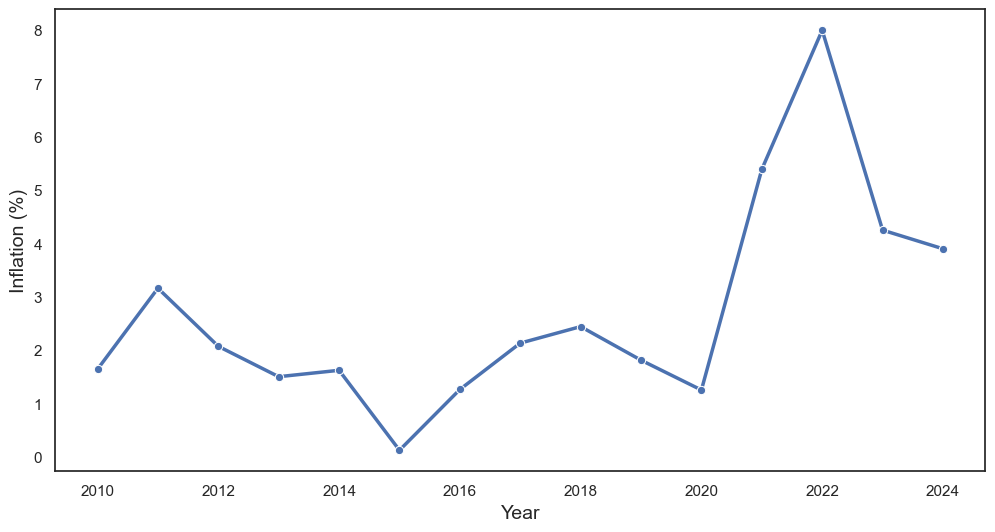

In [31]:
sns.set(style="whitegrid")

plt.figure(figsize=(12,6))
sns.set_style("white")
sns.lineplot(data=usa_df, x=' Year', y=' Inflation Rate (%)', marker='o', linewidth=2.5)

plt.xlabel('Year', fontsize=14)
plt.ylabel('Inflation (%)', fontsize=14)


#plt.savefig('usa_gdp.png', dpi=300, bbox_inches='tight')

plt.show()



In [32]:
usa_df_slowdown=usa_df

In [33]:
usa_df_slowdown['slowdown']=(usa_df_slowdown[' Economic Growth (%)'] < 2).astype(int)

/var/folders/qg/s3zds0bx7dn468711v1v0hnw0000gn/T/ipykernel_66437/2390756167.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  usa_df_slowdown['slowdown']=(usa_df_slowdown[' Economic Growth (%)'] < 2).astype(int)


In [34]:
print(usa_df_slowdown.head())

  Country   Year   GDP (in billion USD)   Inflation Rate (%)  \
0     USA   2010                15000.0                 1.64   
1     USA   2011                15500.0                 3.16   
2     USA   2012                16000.0                 2.07   
3     USA   2013                16500.0                 1.50   
4     USA   2014                17000.0                 1.62   

    Unemployment Rate (%)   Economic Growth (%)  slowdown  
0                    9.63                  2.55         0  
1                    8.94                  1.53         1  
2                    8.10                  2.28         0  
3                    7.70                  1.84         1  
4                    7.25                  2.53         0  


In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [36]:
X_US = usa_df_slowdown[[' Inflation Rate (%)']]
y_US = usa_df_slowdown['slowdown']

XtrainUS, XtestUS, ytrainUS, ytestUS = train_test_split(X_US,y_US, test_size=0.2, random_state=42)

modelUS = LogisticRegression()
modelUS.fit(XtrainUS, ytrainUS)

LogisticRegression()

In [37]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_predUS = modelUS.predict(XtestUS)

print("Accuracy:", accuracy_score(ytestUS, y_predUS))
print(confusion_matrix(ytestUS, y_predUS))
print(classification_report(ytestUS, y_predUS))

Accuracy: 1.0
[[3]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



In [38]:
inflation_2025 = 1.5

X_2025 = [[inflation_2025]]

prediction_2025US = modelUS.predict(X_2025)

if prediction_2025US[0] == 1:
    print("Predicted 2025: Slowdown (Growth < 2%)")
else:
    print("Predicted 2025: No slowdown (Growth >= 2%)")

Predicted 2025: No slowdown (Growth >= 2%)


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [42]:
df['Slowdown'] = (df[' Economic Growth (%)'] < 2).astype(int)

# Group countries
country_tables = {country: df[df['Country'] == country] for country in df['Country'].unique()}

# Assume inflation rate for 2025 (or make a dict if different assumptions for each)
inflation_2025_assumption = {
    country: 1.5 for country in country_tables.keys()
}
# (You can adjust the 3.0 value per country if you want)

# Store results
results = []

for country, data in country_tables.items():
    # Features and label
    X = data[[' Inflation Rate (%)']]
    y = data['Slowdown']
    
    # Check if enough data points
    if len(data) < 5:
        print(f"Skipping {country} - not enough data.")
        continue
        
    if len(y.unique()) < 2:
        print(f"Skipping {country} - only one class ({y.unique()[0]}) in data.")
        continue
    
    # Split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Train model
    model = LogisticRegression()
    model.fit(X_train, y_train)
    
    # Predict for 2025
    inflation_value = inflation_2025_assumption[country]
    X_2025 = [[inflation_value]]
    prediction = model.predict(X_2025)[0]
    probability = model.predict_proba(X_2025)[0][1]*100  # probability of slowdown (class 1)
    
    # Save result
    results.append({
        'Country': country,
        '2025 Inflation Rate': inflation_value,
        'Predicted Slowdown (1=Yes,0=No)': prediction,
        'Probability of Slowdown': probability
    })

# Convert to DataFrame
results_df = pd.DataFrame(results)

# Show the results
print(results_df)


Skipping China - only one class (0) in data.
Skipping Bangladesh - only one class (0) in data.
Skipping Indonesia - only one class (0) in data.
Skipping Turkey - only one class (0) in data.
         Country  2025 Inflation Rate  Predicted Slowdown (1=Yes,0=No)  \
0            USA                  1.5                                0   
1          Japan                  1.5                                1   
2        Germany                  1.5                                0   
3          India                  1.5                                0   
4             UK                  1.5                                1   
5         Canada                  1.5                                0   
6         Russia                  1.5                                0   
7      Australia                  1.5                                0   
8         France                  1.5                                1   
9    South Korea                  1.5                                0

/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarnin

In [43]:
# List of countries to predict
predict_countries = ['China', 'Bangladesh', 'Indonesia', 'Turkey']

# Inflation rate for 2025 (same for all)
inflation_2025 = 1.5

# Prepare input
X_2025 = [[inflation_2025]]  # always 2D for sklearn

# Store results
newresults = []

for country in predict_countries:
    prediction = model.predict(X_2025)[0]
    probability = model.predict_proba(X_2025)[0][1]*100
    
    newresults.append({
        'Country': country,
        '2025 Inflation Rate': inflation_2025,
        'Predicted Slowdown (1=Yes, 0=No)': prediction,
        'Probability of Slowdown': probability
    })

# Create a results DataFrame
new_predictions_df = pd.DataFrame(newresults)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarnin

In [44]:
results_df = pd.concat([results_df, new_predictions_df], ignore_index=True)

print(results_df)

         Country  2025 Inflation Rate  Predicted Slowdown (1=Yes,0=No)  \
0            USA                  1.5                              0.0   
1          Japan                  1.5                              1.0   
2        Germany                  1.5                              0.0   
3          India                  1.5                              0.0   
4             UK                  1.5                              1.0   
5         Canada                  1.5                              0.0   
6         Russia                  1.5                              0.0   
7      Australia                  1.5                              0.0   
8         France                  1.5                              1.0   
9    South Korea                  1.5                              0.0   
10  Saudi Arabia                  1.5                              1.0   
11        Brazil                  1.5                              1.0   
12         Italy                  1.5 

In [45]:
results_df.to_csv('predicted_slowdowns_2025_Logistic_Regression_low.csv', index=False)

In [60]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



In [61]:
dfrf = pd.read_csv('economic_inflation/Economic_Indicators_And_Inflation.csv')

dfrf = dfrf[dfrf[' Year'] != 2025]

country_tables = {country: dfrf[dfrf['Country'] == country] for country in df['Country'].unique()}


In [62]:
from sklearn.ensemble import RandomForestClassifier

In [63]:
dfrf['Slowdown'] = (dfrf[' Economic Growth (%)'] < 2).astype(int)

# Group countries
country_tables = {country: dfrf[dfrf['Country'] == country] for country in df['Country'].unique()}


inflation_2025_assumption = {
    country: 1.5 for country in country_tables.keys()
}

rfresults = []

for country, data in country_tables.items():
    
    X = data[[' Inflation Rate (%)']]
    y = data['Slowdown']
    
    # Check if enough data points
    if len(data) < 5:
        print(f"Skipping {country} - not enough data.")
        continue
        
    if len(y.unique()) < 2:
        print(f"Skipping {country} - only one class ({y.unique()[0]}) in data.")
        continue

    rfmodel = RandomForestClassifier(random_state=42)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    rfmodel.fit(X_train, y_train)
    
    # Predict for 2025
    inflation_value = inflation_2025_assumption[country]
    X_2025 = [[inflation_value]]
    prediction = rfmodel.predict(X_2025)[0]
    probability = rfmodel.predict_proba(X_2025)[0][1]*100  # probability of slowdown (class 1)
    
    # Save result
    rfresults.append({
        'Country': country,
        '2025 Inflation Rate': inflation_value,
        'Predicted Slowdown (1=Yes,0=No)': prediction,
        'Probability of Slowdown': probability
    })

# Convert to DataFrame
rfresults_df = pd.DataFrame(rfresults)

# Show the results
print(rfresults_df)


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/bas

Skipping China - only one class (0) in data.


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/bas

Skipping Bangladesh - only one class (0) in data.
Skipping Indonesia - only one class (0) in data.
Skipping Turkey - only one class (0) in data.
         Country  2025 Inflation Rate  Predicted Slowdown (1=Yes,0=No)  \
0            USA                  1.5                                1   
1          Japan                  1.5                                1   
2        Germany                  1.5                                0   
3          India                  1.5                                0   
4             UK                  1.5                                0   
5         Canada                  1.5                                1   
6         Russia                  1.5                                0   
7      Australia                  1.5                                0   
8         France                  1.5                                0   
9    South Korea                  1.5                                0   
10  Saudi Arabia                  1.5    

/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [65]:

# Predict
y_pred_rf = rfmodel.predict(X_test)

# Evaluate
print("Random Forest Model Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("F1-Score:", f1_score(y_test, y_pred_rf))

# Full report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))

Random Forest Model Performance:
Accuracy: 1.0
Precision: 0.0
Recall: 0.0
F1-Score: 0.0

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


In [66]:
# List of countries to predict
predict_countries = ['China', 'Bangladesh', 'Indonesia', 'Turkey']

# Inflation rate for 2025 (same for all)
inflation_2025 = 3.5

# Prepare input
X_2025 = [[inflation_2025]]  # always 2D for sklearn

# Store results
newresultsrf = []

for country in predict_countries:
    prediction = rfmodel.predict(X_2025)[0]
    probability = rfmodel.predict_proba(X_2025)[0][1]*100
    
    newresultsrf.append({
        'Country': country,
        '2025 Inflation Rate': inflation_2025,
        'Predicted Slowdown (1=Yes, 0=No)': prediction,
        'Probability of Slowdown': probability
    })

# Create a results DataFrame
new_predictions_dfrf = pd.DataFrame(newresultsrf)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/bas

In [67]:
rfresults_df = pd.concat([rfresults_df, new_predictions_dfrf], ignore_index=True)

print(rfresults_df)

         Country  2025 Inflation Rate  Predicted Slowdown (1=Yes,0=No)  \
0            USA                  1.5                              1.0   
1          Japan                  1.5                              1.0   
2        Germany                  1.5                              0.0   
3          India                  1.5                              0.0   
4             UK                  1.5                              0.0   
5         Canada                  1.5                              1.0   
6         Russia                  1.5                              0.0   
7      Australia                  1.5                              0.0   
8         France                  1.5                              0.0   
9    South Korea                  1.5                              0.0   
10  Saudi Arabia                  1.5                              1.0   
11        Brazil                  1.5                              1.0   
12         Italy                  1.5 

In [68]:
rfresults_df.to_csv('predicted_slowdowns_2025_Random_Forest_low.csv', index=False)

In [54]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pandas as pd

In [55]:
df_cluster = pd.read_csv('economic_inflation/Economic_Indicators_And_Inflation.csv')


In [56]:
df_cluster = df_cluster[df_cluster[' Year'] != 2025]

In [57]:
print(df_cluster)

      Country   Year   GDP (in billion USD)   Inflation Rate (%)  \
0         USA   2010                15000.0                 1.64   
1         USA   2011                15500.0                 3.16   
2         USA   2012                16000.0                 2.07   
3         USA   2013                16500.0                 1.50   
4         USA   2014                17000.0                 1.62   
..        ...    ...                    ...                  ...   
298  Pakistan   2020                  263.0                10.70   
299  Pakistan   2021                  296.0                 8.90   
300  Pakistan   2022                  350.0                12.30   
301  Pakistan   2023                  400.0                20.00   
302  Pakistan   2024                  450.0                25.00   

      Unemployment Rate (%)   Economic Growth (%)  
0                      9.63                  2.55  
1                      8.94                  1.53  
2                      8.10

In [58]:
features =[' GDP (in billion USD)',' Inflation Rate (%)',' Unemployment Rate (%)',' Economic Growth (%)']


In [59]:
# Select features
X = df_cluster[features]

# Check
print(X.head())

    GDP (in billion USD)   Inflation Rate (%)   Unemployment Rate (%)  \
0                15000.0                 1.64                    9.63   
1                15500.0                 3.16                    8.94   
2                16000.0                 2.07                    8.10   
3                16500.0                 1.50                    7.70   
4                17000.0                 1.62                    7.25   

    Economic Growth (%)  
0                  2.55  
1                  1.53  
2                  2.28  
3                  1.84  
4                  2.53  


In [142]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [143]:
# Choose number of clusters (k=3 for example)
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)

# Assign clusters back to the DataFrame
df_cluster['Cluster'] = kmeans.labels_

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [144]:
# Group by Country and Cluster
country_clusters = df_cluster.groupby('Country')['Cluster'].agg(lambda x: x.value_counts().index[0])

# Display
print(country_clusters)

Country
Australia       1
Bangladesh      1
Brazil          1
Canada          1
China           1
France          1
Germany         1
India           1
Indonesia       1
Italy           1
Japan           1
Malaysia        1
Pakistan        1
Russia          1
Saudi Arabia    1
South Korea     1
Turkey          0
UK              1
USA             2
Name: Cluster, dtype: int32


In [145]:
# Reset index to make a table
country_clusters = country_clusters.reset_index()

# Rename the columns nicely
country_clusters.columns = ['Country', 'Assigned Cluster']

# Sort by Cluster for nice grouping
country_clusters = country_clusters.sort_values(by='Assigned Cluster')

# Show
print(country_clusters)

         Country  Assigned Cluster
16        Turkey                 0
0      Australia                 1
15   South Korea                 1
14  Saudi Arabia                 1
13        Russia                 1
12      Pakistan                 1
11      Malaysia                 1
10         Japan                 1
17            UK                 1
9          Italy                 1
7          India                 1
6        Germany                 1
5         France                 1
4          China                 1
3         Canada                 1
2         Brazil                 1
1     Bangladesh                 1
8      Indonesia                 1
18           USA                 2


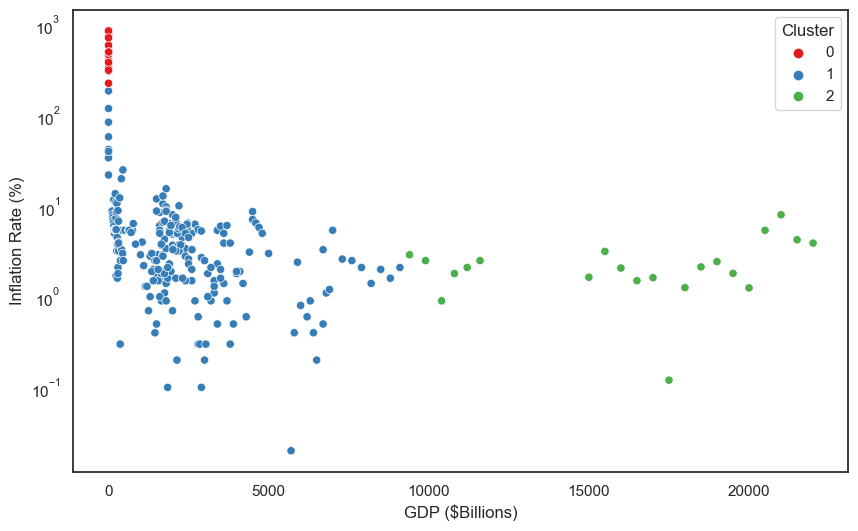

In [146]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df_cluster, x=' GDP (in billion USD)', y=' Inflation Rate (%)', hue='Cluster', palette='Set1')
plt.yscale('log')
plt.xlabel('GDP ($Billions)')
plt.ylabel('Inflation Rate (%)')
plt.savefig('kmeansclusteringLow.png', dpi=300, bbox_inches='tight')
plt.show()

In [148]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

In [150]:
# Use only the latest year for each country or average over years
# For simplicity, let's take the most recent year
df_latest = df_cluster.sort_values(' Year').groupby('Country').tail(1)

X = df_latest[features]

# Save country names for later
countries = df_latest['Country'].values

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [151]:
Z = linkage(X_scaled, method='ward')

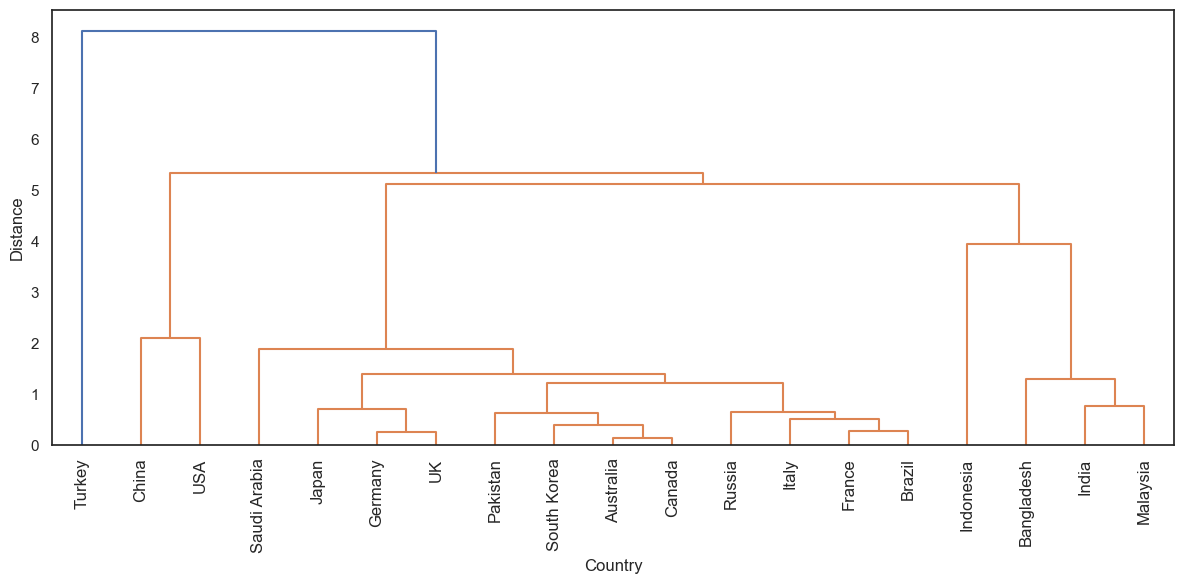

In [155]:
plt.figure(figsize=(12, 6))
dendrogram(Z, labels=countries, leaf_rotation=90)
plt.xlabel('Country')
plt.ylabel('Distance')
plt.tight_layout()
plt.savefig('hierachicalclusteringLow.png', dpi=300, bbox_inches='tight')
plt.show()

In [153]:
# Assign cluster labels from dendrogram
labels = fcluster(Z, t=4, criterion='maxclust')

# Add to DataFrame
df_latest['Cluster'] = labels

# See country to cluster mapping
print(df_latest[['Country', 'Cluster']].sort_values(by='Cluster'))

          Country  Cluster
30          China        1
14            USA        1
302      Pakistan        2
190  Saudi Arabia        2
158        France        2
142     Australia        2
62        Germany        2
222         Italy        2
110        Canada        2
94             UK        2
206        Brazil        2
126        Russia        2
46          Japan        2
174   South Korea        2
78          India        3
286      Malaysia        3
238    Bangladesh        3
254     Indonesia        3
270        Turkey        4


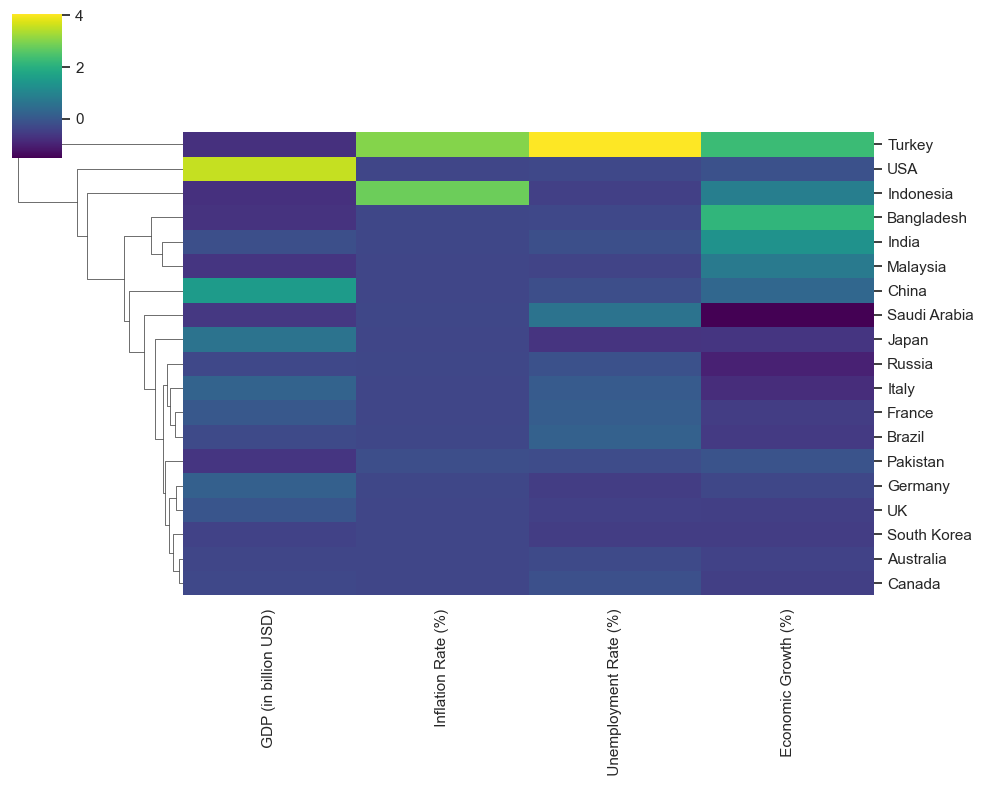

In [154]:
sns.clustermap(X_scaled, row_cluster=True, col_cluster=False, row_colors=None,
               figsize=(10, 8), cmap='viridis', xticklabels=features, yticklabels=countries)